In [1]:
%load_ext autoreload
%autoreload 2

In [2]:


import numpy as np
import pandas as pd
from bib.cleaning import *
from bib.plot import *
from bib.rede import *
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.optimize import curve_fit

def Lognormal(x, a, b):
    return 1/(x*b*np.sqrt(2*np.pi))*np.exp(-(np.log(x) - a)**2/(2*b**2))

def modelo(x,a,b):
    return x*a*np.exp(-b*x)


In [22]:
brasil = pd.read_csv("./input/Censo 2022 - Pirâmide etária - Brasil.csv",sep=';')
del brasil['Unnamed: 4']
del brasil['Unnamed: 5']
del brasil['Recorte Geográfico']
brasil['Total'] = brasil['População feminina(pessoas)'] + brasil['População masculina(pessoas)']
brasil

,Grupo de idade,População feminina(pessoas),População masculina(pessoas),Total
0,100 anos ou mais,27244,10570,37814
1,95 a 99 anos,114859,50319,165178
2,90 a 94 anos,385388,194341,579729
3,85 a 89 anos,835554,493649,1329203
4,80 a 84 anos,1465178,1009852,2475030
5,75 a 79 anos,2189593,1657786,3847379
6,70 a 74 anos,3243186,2615350,5858536
7,65 a 69 anos,4288180,3588052,7876232
8,60 a 64 anos,5338555,4605834,9944389
9,55 a 59 anos,6149601,5419505,11569106


In [23]:
quartis = [0,20,30,50,70,10000]
brasil['Grupo de idade'] = [int(i.split(" ")[0]) for i in brasil['Grupo de idade']]
brasil

,Grupo de idade,População feminina(pessoas),População masculina(pessoas),Total
0,100,27244,10570,37814
1,95,114859,50319,165178
2,90,385388,194341,579729
3,85,835554,493649,1329203
4,80,1465178,1009852,2475030
5,75,2189593,1657786,3847379
6,70,3243186,2615350,5858536
7,65,4288180,3588052,7876232
8,60,5338555,4605834,9944389
9,55,6149601,5419505,11569106


In [27]:
soma = np.zeros(len(quartis))
for i in brasil[['Grupo de idade','Total']].values[::-1]:
    for j in range(len(quartis)):
        if(i[0]< quartis[j]):
            soma[j] += i[1]
            break

In [34]:
np.savetxt('./C/dados/pop_brasil.txt',soma[1:]/np.sum(soma),fmt = "%f") 

In [3]:
polymod = pd.read_csv("./input/POLYMOD/2008_Mossong_POLYMOD_contact_common.csv")
polymod_ = pd.read_csv("./input/POLYMOD/2008_Mossong_POLYMOD_hh_common.csv")
polymod_ids = pd.read_csv("./input/POLYMOD/2008_Mossong_POLYMOD_participant_common.csv")
polymod = polymod[polymod["cnt_age_exact"].notnull()]

/tmp/ipykernel_13373/1338378792.py:1: DtypeWarning: Columns (6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  polymod = pd.read_csv("./input/POLYMOD/2008_Mossong_POLYMOD_contact_common.csv")


In [4]:
connections = polymod[["part_id","cont_id","cnt_age_exact","duration_multi"]]
#connections = connections[connections['frequency_multi'] <3 ]
connections = pd.merge(polymod_ids[["part_id","part_age"]], connections, on='part_id', how='inner')
quartis = [0,20,30,50,70,10000]
connections = transform_faixa(connections,"part_age",quartis)
connections = transform_faixa(connections,"cnt_age_exact",quartis)
connections = connections[["part_id","part_ageFaixas","cnt_age_exactFaixas","duration_multi"]]

In [5]:
connections

,part_id,part_ageFaixas,cnt_age_exactFaixas,duration_multi
0,1,0,2,4.0
1,1,0,0,5.0
2,1,0,2,4.0
3,1,0,0,5.0
4,1,0,1,3.0
...,...,...,...,...
97779,8001,0,0,5.0
97780,8001,0,0,5.0
97781,8001,0,2,5.0
97782,8001,0,2,3.0


In [6]:
valores = np.array([2.5,10,75/2,150,300])
x = connections['duration_multi'].values.astype(int) - 1
duracao = np.array([valores[i]if(i < 10) else 1000000000  for i in x ])
connections['duracao'] = duracao
connections = connections[connections['duracao'] <1000000000 ]

In [7]:
duracao = np.zeros((5,5))
N = np.zeros((5,5))
std = np.zeros((5,5))
for i in connections[['part_ageFaixas','cnt_age_exactFaixas','duracao']].values:
    duracao[int(i[0])][int(i[1])] += i[2]
    duracao[int(i[1])][int(i[0])] += i[2]
    std[int(i[0])][int(i[1])] += i[2]**2
    std[int(i[1])][int(i[0])] += i[2]**2
    N[int(i[0])][int(i[1])] += 1
    N[int(i[1])][int(i[0])] += 1
duracao = duracao/N
std = std/N
std = np.sqrt(std - duracao**2)

In [10]:
np.savetxt("./C/dados/media.txt",duracao,fmt="%f")
np.savetxt("./C/dados/std.txt",std,fmt="%f")

In [55]:
701882.5/5294

132.5807517944843

In [7]:
ligacoes = np.zeros((5,5))
for i in connections[['part_ageFaixas','cnt_age_exactFaixas']].values:
    ligacoes[i[0],i[1]] += 1
    ligacoes[i[1],i[0]] += 1
ligacoes

array([[47714.,  5294., 14170.,  5631.,  1151.],
       [ 5294.,  8496.,  7064.,  4016.,   486.],
       [14170.,  7064., 21660., 10247.,  1607.],
       [ 5631.,  4016., 10247., 10936.,  1922.],
       [ 1151.,   486.,  1607.,  1922.,   840.]])

In [8]:
faixas = connections.drop_duplicates(subset='part_id')['part_ageFaixas'].values
N_ = np.unique(faixas,return_counts=True)[1]
contagem = pd.crosstab(connections['part_id'], connections['cnt_age_exactFaixas']).values

In [9]:
total_ligacoes = np.zeros((5,5))
for i in range(5):
    for j in range(5):
        if(i == j):
            total_ligacoes[i][j] = N_[i]*(N_[i]-1)/2
        else:
            total_ligacoes[i][j] = N_[i]*N_[j]

In [11]:
np.savetxt("./C/dados/prob_conexao.txt",ligacoes/total_ligacoes,fmt = "%f")

In [11]:
z = np.zeros((5,5))
for i in range(5):
    x = np.sum(contagem[faixas == i],axis=0)
    z[i] = x/np.sum(x)

In [14]:
z

array([[0.58511433, 0.08372889, 0.23220008, 0.08037973, 0.01857697],
       [0.15752391, 0.36185204, 0.31404127, 0.14292904, 0.02365375],
       [0.19509157, 0.14114862, 0.45446618, 0.17295793, 0.0363357 ],
       [0.13402236, 0.13289895, 0.35010953, 0.31230691, 0.07066225],
       [0.15959596, 0.0840404 , 0.30181818, 0.2820202 , 0.17252525]])

In [13]:
np.savetxt("./C/dados/multi_probability2.txt",z)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 46 47 54] [182 289 306 273 203 156 107 102  77  84  76  67  67  62  46  45  50  33
  43  46  34  34  41  27  25  43  31  22  16  14  15   9   6  10  11  10
   7   6   8  10   2   6   3   2   2   1   2   1]


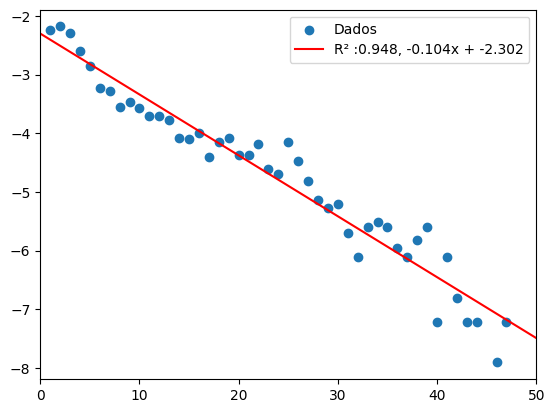

In [92]:
faixa = 0
x,y = np.unique(contagem[faixas == faixa].T[faixa],return_counts= True)
print(x,y)
y = y/np.sum(y)
regressor = LinearRegression()
regressor.fit(x[x>0].reshape(-1,1), np.log(y[x>0]))
coeficientes = regressor.coef_[0]
intercepto = regressor.intercept_
plt.scatter(x[x>0], np.log(y[x>0]), label="Dados")
plt.xlim(0,50)
r2 = regressor.score(x[x>0].reshape(-1,1), np.log(y[x>0]))
plt.plot(x,x*coeficientes + intercepto,color = 'red',label = 'R² :{:.3f}, {:.3f}x + {:.3f}'.format(r2,coeficientes,intercepto))

plt.legend()
plt.show()


In [45]:
a = np.zeros(len(N_))
for i,j in connections[['part_ageFaixas','cnt_age_exactFaixas']].values:
    if(i == j):
        a[i] += 1

In [50]:
a/(N_*N_/2)

array([0.00660345, 0.01139913, 0.00742447, 0.00426344, 0.00813519])

In [37]:
contagem = np.unique(connections["part_id"],return_counts=True)[1]

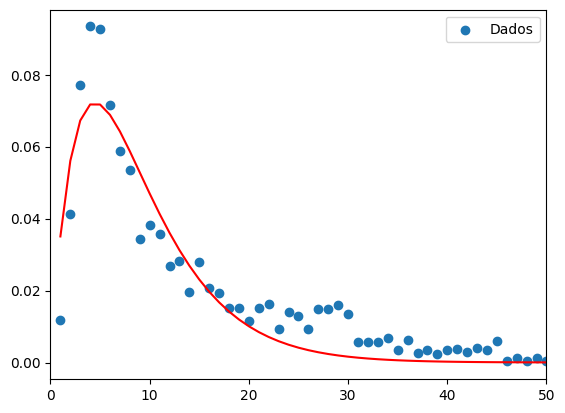

[0.04380845 0.22329433]


In [65]:
x,y = np.unique(contagem[faixas == 0],return_counts=True)
y = y/np.sum(y)
parametros_iniciais = [1, 1]  # Valores iniciais dos parâmetros
parametros_otimizados, covariancia = curve_fit(modelo, x, y, p0=parametros_iniciais,)

# Parâmetros otimizados
par1, par2= parametros_otimizados
plt.scatter(x, y, label="Dados")
plt.xlim(0,50)
plt.plot(x, modelo(x, par1, par2), color = 'red')
plt.legend()
plt.show()
print(parametros_otimizados)

In [4]:
df = polymod[['phys_contact','duration_multi']]
df = df.dropna()

In [5]:
df.head()

,phys_contact,duration_multi
0,1.0,4.0
1,1.0,5.0
2,1.0,4.0
3,1.0,5.0
4,1.0,3.0


In [10]:
create_multi_bar(polymod)

In [3]:
df_merged = pd.merge(polymod_ids,polymod, on='part_id')

# Agora, o DataFrame 'df_merged' terá as colunas 'id', 'valor' e 'novo_id'
# Se quiser manter apenas 'novo_id' e 'valor', pode descartar a coluna 'id'
df_merged = df_merged.drop('part_id', axis=1)

NameError: name 'polymod_ids' is not defined

In [23]:
polymod_

,hh_id,country,hh_size
0,Mo08HH1,IT,3
1,Mo08HH2,IT,3
2,Mo08HH3,IT,3
3,Mo08HH4,IT,3
4,Mo08HH5,IT,4
...,...,...,...
7285,Mo08HH8000,BE,3
7286,Mo08HH8001,BE,6
7287,Mo08HH50036,BE,1
7288,Mo08HH50037,BE,1


In [3]:
a = get_all_data()
a

,Contato_idade,id,Idade
0,24.0,Belgica2006_0,22.0
1,22.0,Belgica2006_0,22.0
2,22.0,Belgica2006_0,22.0
3,48.0,Belgica2006_0,22.0
4,25.0,Belgica2006_0,22.0
...,...,...,...
215650,9.0,Zimbabwe_1244,7.0
215651,9.0,Zimbabwe_1244,7.0
215652,53.0,Zimbabwe_1244,7.0
215653,29.0,Zimbabwe_1244,7.0


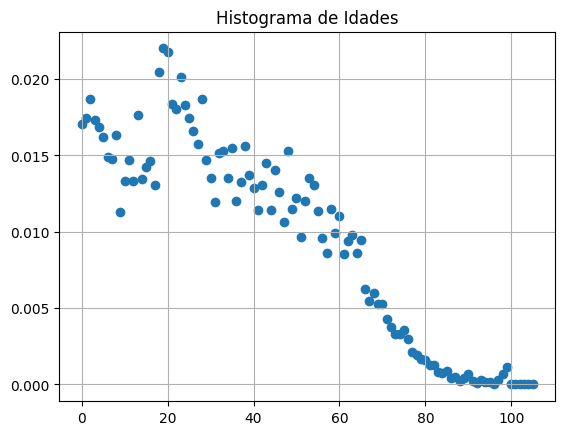

In [5]:
plot_idades(a)

In [4]:
quartis = [0,20,30,50,70,10000]

In [5]:
a = transform_faixa(a,"Idade",quartis)
a = transform_faixa(a,"Contato_idade",quartis)

In [6]:
polymod = [i for i in a['id'].unique() if('POLYMOD' in i)]
polymod = a[a['id'].isin(polymod)]

In [7]:
contagem = pd.crosstab(polymod['id'], polymod['Contato_idadeFaixas']).values
faixas = polymod.drop_duplicates(subset='id')['IdadeFaixas'].values

In [60]:
def LR(x,y):
    reg = LinearRegression()
    reg.fit(x.reshape(-1,1),y)
    R2 = r2_score(reg.predict(x.reshape(-1,1)),y)
    return R2,reg.coef_[0]

In [8]:
contagem

array([[13,  1,  4,  2,  0],
       [ 0,  0,  2,  2,  0],
       [ 2,  2,  3,  1,  0],
       ...,
       [ 0,  2,  1,  1,  0],
       [ 3,  2,  0,  1,  0],
       [ 2,  0,  3,  1,  0]])

In [8]:
modelo_k = np.loadtxt("./C/output/modelo/teste.txt").astype(int)
graus = np.array([np.sum(modelo_k[:,1:],axis = 1),modelo_k.T[0]]).T
graus_idade = modelo_k[:,1:]
faixas = modelo_k.T[0]

In [9]:
print(f"Grau médio: {np.mean(np.sum(graus_idade,axis = 1))}")
for f in range(5):
    print(f"Grau médio da faixa etária {f+1}: {np.mean(np.sum(graus_idade[faixas == f],axis = 1))}")

Grau médio: 13.574188343302268
Grau médio da faixa etária 1: 12.978055970768976
Grau médio da faixa etária 2: 14.130133556686483
Grau médio da faixa etária 3: 13.44314478878936
Grau médio da faixa etária 4: 13.943596379492778
Grau médio da faixa etária 5: 14.119351192718764


In [10]:
z = np.zeros((5,5))
for i in range(5):
    x = np.sum(graus_idade[faixas == i],axis=0)
    z[i] = x/np.sum(x)
z

array([[0.22608286, 0.16629021, 0.31293921, 0.22465995, 0.07002777],
       [0.26790708, 0.16735092, 0.27943492, 0.20832721, 0.07697987],
       [0.2675287 , 0.14827693, 0.30209788, 0.21628604, 0.06581045],
       [0.27152668, 0.1562843 , 0.3057771 , 0.20930742, 0.05710449],
       [0.24591568, 0.16779369, 0.27033381, 0.16592023, 0.15003658]])

In [11]:
result = []
for i in range(5):
    M = graus_idade[faixas == i]
    kzinho = np.sum(M,axis = 1)
    M = M[kzinho != 0]
    kzinho = kzinho[kzinho != 0]
    M = M /  kzinho[:, np.newaxis]
    result.append(np.mean(M,axis=0))

In [12]:
result

[array([0.20709265, 0.17959765, 0.29091904, 0.23451754, 0.08787312]),
 array([0.23674308, 0.1896995 , 0.24340489, 0.22135843, 0.1087941 ]),
 array([0.24315116, 0.15940243, 0.27944395, 0.23448449, 0.08351796]),
 array([0.25119206, 0.17771124, 0.26571299, 0.22675314, 0.07863058]),
 array([0.18426398, 0.18769198, 0.18679573, 0.16376778, 0.27748052])]

In [13]:
compara(graus,polymod)

As amostras provavelmente vêm da mesma distribuição 1.0.
As amostras provavelmente vêm da mesma distribuição 1.0.
As amostras provavelmente vêm da mesma distribuição 1.0.
As amostras provavelmente vêm da mesma distribuição 1.0.
As amostras provavelmente vêm da mesma distribuição 0.916.


In [40]:
matrix_k = np.loadtxt("./C/matrix_k.txt").astype(int)
result = []
for i in range(5):
    M = matrix_k[matrix_k.T[0] == i][:,1:]
    kzinho = np.sum(M,axis = 1)

    M = M /  kzinho[:, np.newaxis]
    result.append(np.mean(M,axis=0))

In [14]:
print(f"Grau médio: {np.mean(np.sum(contagem,axis = 1))}")
for f in range(5):
    print(f"Grau médio da faixa etária {f+1}: {np.mean(np.sum(contagem[faixas == f],axis = 1))}")

Grau médio: 13.531506468215328


IndexError: boolean index did not match indexed array along dimension 0; dimension is 7189 but corresponding boolean dimension is 718900

In [32]:
resultado = np.loadtxt("./C/test.txt")
faixas_ = np.loadtxt("./C/test2.txt")

In [8]:
contagem = pd.crosstab(polymod['id'], polymod['Contato_idadeFaixas']).values
faixas = polymod.drop_duplicates(subset='id')['IdadeFaixas'].values

In [144]:
data = pd.read_csv('./output/participantes.csv')
contatos01 = pd.read_csv('./output/contatos_01.csv')

In [40]:
vetor[vetor != np.arange(len(vetor))[np.sum(vetor,axis = 1) == 0]]

/tmp/ipykernel_19787/3761567207.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  vetor[vetor != np.arange(len(vetor))[np.sum(vetor,axis = 1) == 0]]


array([[[18.,  8., 23.,  7.,  2.],
        [21.,  7., 20.,  8.,  2.],
        [12., 12., 22.,  7.,  2.],
        ...,
        [ 6.,  0.,  1.,  0.,  0.],
        [11.,  0.,  2.,  0.,  0.],
        [ 2.,  0.,  0.,  0.,  0.]]])

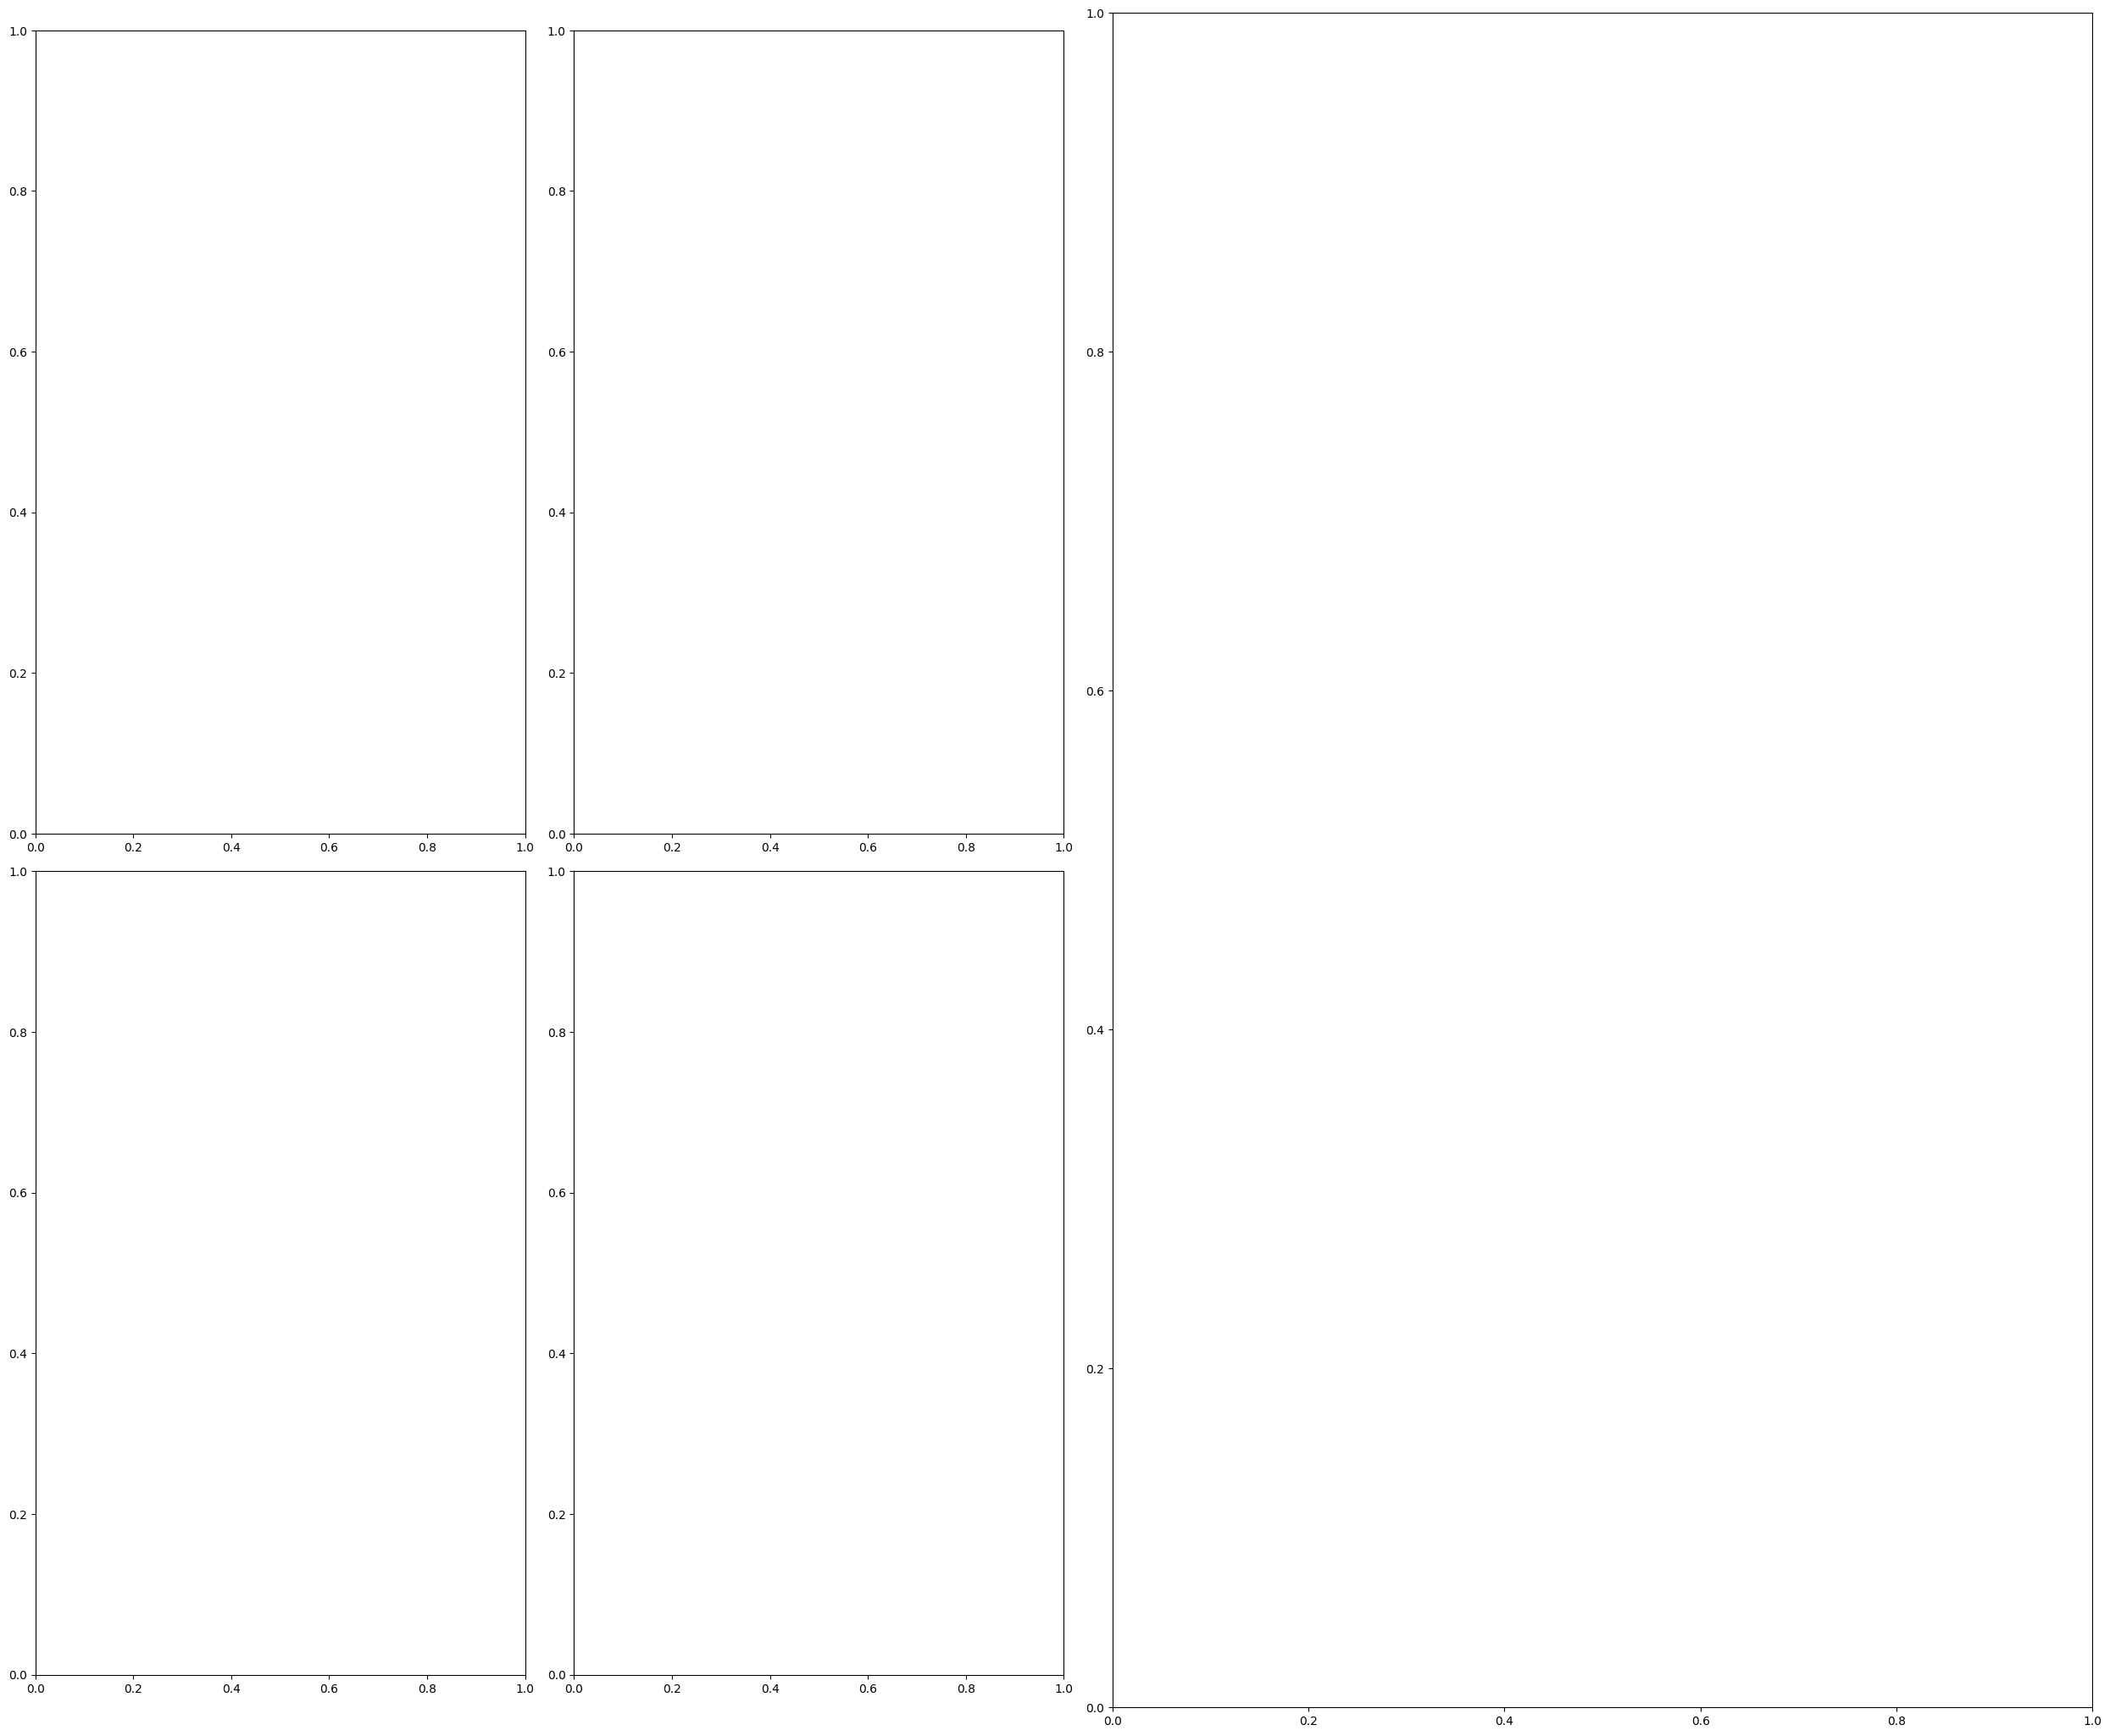

In [14]:
A,B,C,S = generate_distribution_byfaixas(contagem,faixas)

In [35]:
heat_map(B,'h')

In [16]:
matrix_k = np.loadtxt("./C/output/modelo/matrix_0.00.txt").astype(int)
result = []
for i in range(5):
    M = matrix_k[matrix_k.T[0] == i][:,1:]
    kzinho = np.sum(M,axis = 1)

    M = M /  kzinho[:, np.newaxis]
    result.append(np.mean(M,axis=0))
result = np.array(result)
result = result - B
heat_map(result,np.array(range(1,6)),np.array(range(1,6)),'modelo')

In [29]:
fig = go.Figure()
x,y = np.unique(polymod['IdadeFaixas'],return_counts=True)
y = y/np.sum(y)
fig.add_trace(go.Bar(
    x=[f"Faixa {i+1}" for i in x],
    y=y,
    text=np.round(y,2),  # Texto exibido no hover
    textposition='outside',  # Posição do texto (pode ser 'inside', 'outside', 'auto', 'none')
    marker=dict(line=dict(color='black', width=1),color = px.colors.qualitative.Prism[1])
))
# Adicione título e rótulos aos eixos
fig.update_layout(
    width = 800,
    height = 600,
    yaxis=dict(title='Frequência', tickfont=dict(size=15)),
    xaxis=dict(title='Valores', tickfont=dict(size=15)),
    font=dict(
        #family="Courier New, monospace",
        size=15,
        #color="RebeccaPurple"
    ),
    template = 'seaborn',
    paper_bgcolor='rgba(0,0,0,0)', 
)
s = 20
fig.update_layout(margin=dict(l=s, r=s, t=s, b=s))

# Exiba o gráfico
fig.show()
fig.write_image("./img/faixas_polymod.png")

In [38]:
polymod

,Contato_idade,id,Idade,IdadeFaixas,Contato_idadeFaixas
58662,42.0,POLYMOD_0,8.0,0,2
58663,9.0,POLYMOD_0,8.0,0,0
58664,42.0,POLYMOD_0,8.0,0,2
58665,8.0,POLYMOD_0,8.0,0,0
58666,29.0,POLYMOD_0,8.0,0,1
...,...,...,...,...,...
156561,11.0,POLYMOD_7286,14.0,0,0
156562,3.0,POLYMOD_7286,14.0,0,0
156563,43.0,POLYMOD_7286,14.0,0,2
156564,33.0,POLYMOD_7286,14.0,0,2


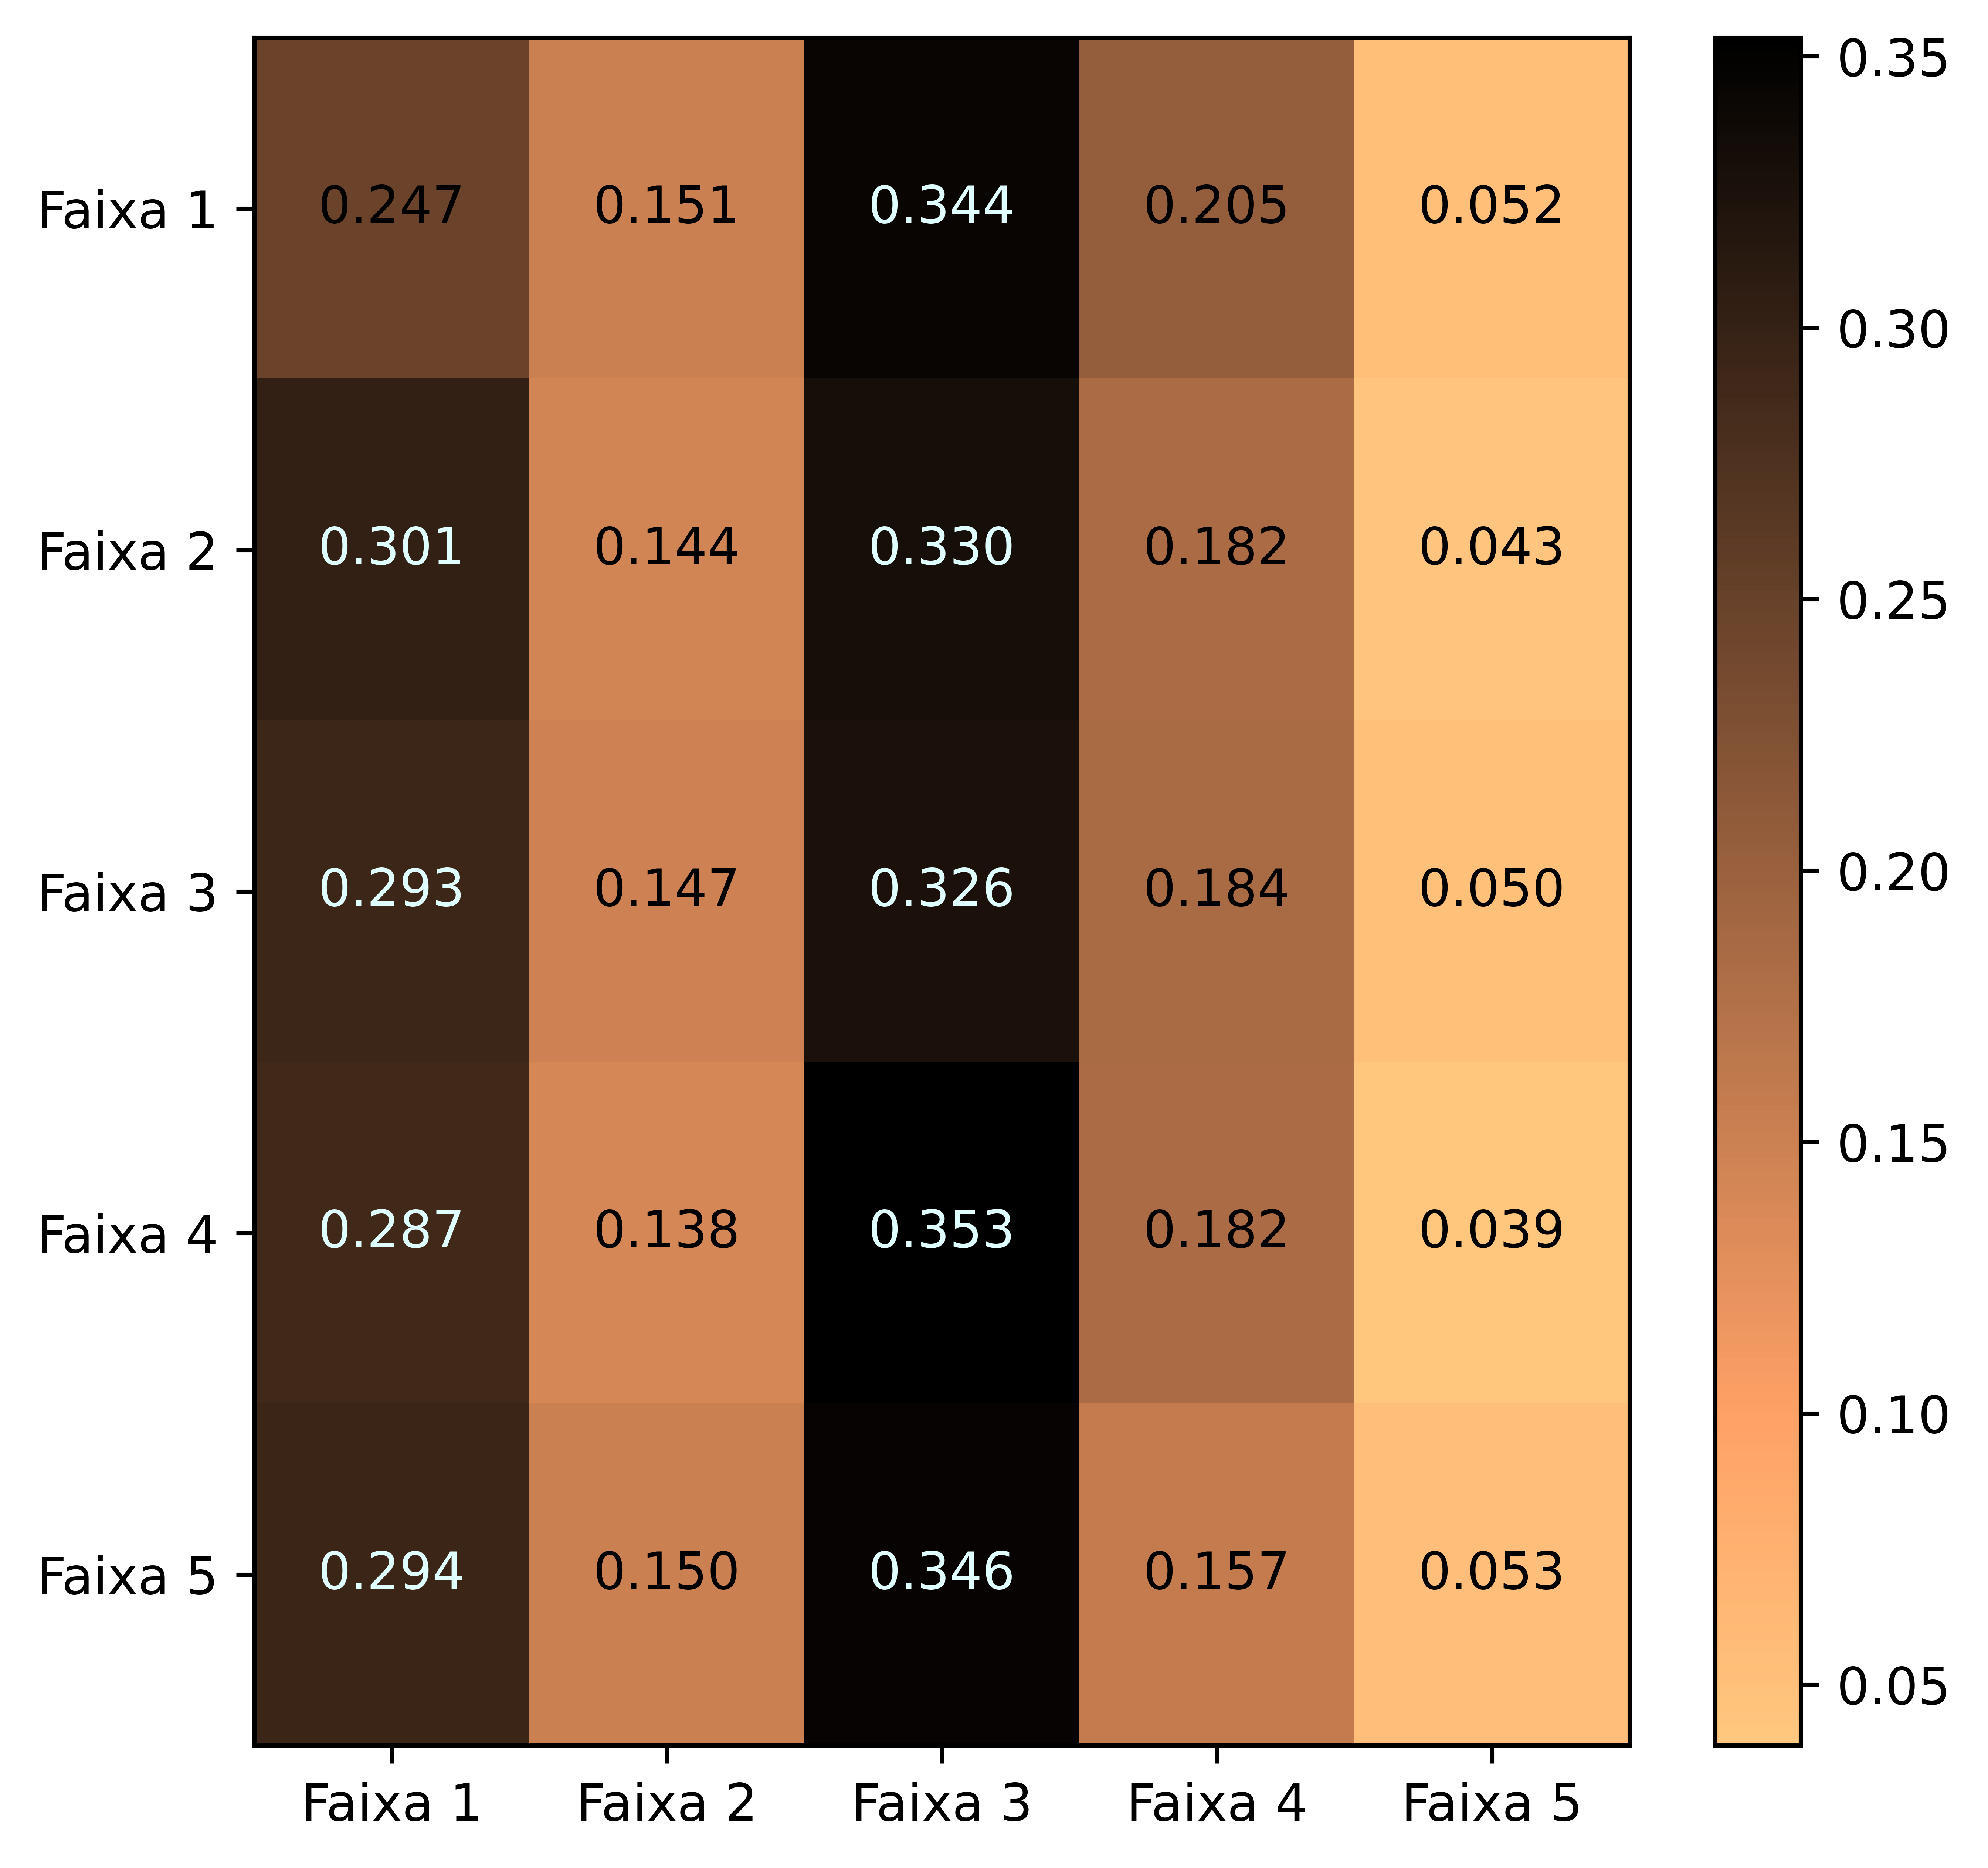

In [69]:
B = np.array(B)
plt.figure(figsize=(6,6),dpi = 1000)
plt.imshow(B, cmap='copper_r', aspect='auto')
for i in range(B.shape[0]):
    for j in range(B.shape[1]):
        plt.annotate(f'{B[i, j]:.3f}', xy=(j, i), ha='center', va='center', color='lightcyan' if(B[i, j] > 0.25) else "black")
# Configurações do heatmap
x_labels = [f"Faixa {i+1}"for i in range(5)]
y_labels = [f"Faixa {i+1}"for i in range(5)]
plt.xticks(np.arange(B.shape[1]), x_labels)
plt.yticks(np.arange(B.shape[0]), y_labels)
plt.colorbar()  # Barra de cores indicando os valores
#plt.title('Heatmap Example')
plt.savefig("./img/heat.png")
# Exibir o heatmap
plt.show()

In [12]:
vetor = np.loadtxt("./C/test.txt")
faixa_ = np.loadtxt("./C/test2.txt",dtype=int)

In [15]:
print(f"Grau médio dos dados: {np.mean(np.sum(vetor,axis = 1))}")
for i in range(5):
    print(np.sum(contagem[faixas == i].T,axis = 1)/np.sum(np.sum(contagem[faixas == i].T,axis = 1)))

Grau médio dos dados: 13.464059059707292
[0.29771209 0.15052667 0.33562691 0.17518972 0.04094461]
[0.35855049 0.13868078 0.31490228 0.15081433 0.03705212]
[0.37348668 0.13827395 0.30140955 0.15046697 0.03636285]
[0.37149152 0.12941176 0.31777925 0.14611148 0.03520599]
[0.38118684 0.13708215 0.30707437 0.13397253 0.04068412]


In [50]:
for i in range(5):
    print(np.sum(vetor[faixa_ == i].T,axis = 1)/np.sum(np.sum(vetor[faixa_ == i].T,axis = 1)))

[0.25003844 0.14827003 0.34224204 0.20805782 0.05139167]
[0.33518737 0.13390809 0.31669332 0.17082667 0.04338455]
[0.33351316 0.13651621 0.30504106 0.18120242 0.04372715]
[0.35495042 0.12891547 0.31722546 0.164017   0.03489165]
[0.36067343 0.13468595 0.31491474 0.14353551 0.04619037]


In [80]:
np.savetxt("./C/dados/lambda.txt",-np.array(A),fmt = "%f")
np.savetxt("./C/dados/multi_probability.txt",np.array(B),fmt = "%f")
np.savetxt("./C/dados/multi_constant.txt",np.exp(np.array(C)),fmt = "%f")